# Tier1 

## Import Data

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import sys
import string
import re
import nltk

print(sys.version)
print(sys.executable)

import utils.ParseXML as ParseXML

# Specify the path to your XML filec
xml_file_path = r'C:\dev\NLP-Sandbox\PURE\requirements-xml\0000 - cctns.xml'
# Define the namespace
namespace = {'ns': 'req_document.xsd'}

# import utils.ParseXML as ParseXML
df = ParseXML.process_xml_with_namespace(xml_file_path, namespace)
df.head(30)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\python.exe


,tag,text,id,path
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title
4,version,1.0,,req_document/version
5,title,INTRODUCTION,1,req_document/p/title
6,title,The Functional Requirements Specifications (FR...,,req_document/p/text_body
7,title,FUNCTIONAL OVERVIEW,2,req_document/p/title
8,title,CCTNS V1.0 functionality is designed to focus ...,,req_document/p/text_body
9,title,DESCRIPTION OF THE MODULES AND FUNCTIONAL REQU...,3,req_document/p/title


### Remove punctiation, Tokenization and remove stopwords


In [2]:
import utils.CleanData as CleanData

df['text_clean'] = df['text'].apply(lambda x: CleanData.clean_text(x.lower(),False,False))

# Display the sub-dataframe
df.head()

,tag,text,id,path,text_clean
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title,"[e-governance, mission, mode, project, mmp]"
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title,"[crime, criminal, tracking, network, and, syst..."
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title,"[functional, requirements, specification, v1, ..."
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title,"[ministry, of, home, affairs, government, of, ..."
4,version,1.0,,req_document/version,"[1, 0]"


### lemmatizing

- See how the lemmatizing function reacts to erros, abbreviations and non indexed words

DAL ( Development Assurance Levels or Design Assurance Levels ) 
IDAL ( Item Development Assurance Levels used for the software )
Automotive Safety Integrity Level (ASIL)
ECSS-Q-ST-40 ( Safety )

In [3]:
# Assuming you have some form of tokenized_text
uncommon_words = ["Devel", "Assurance", "DAL", "SIL", "ECSS-Q-ST-40"]

for word in uncommon_words:
    print(CleanData.lemmatizing([word]))


df['text_clean_lemma'] = df['text_clean'].apply(lambda x: CleanData.lemmatizing(x))

# Display the sub-dataframe
df.head(20)


['Devel']
['Assurance']
['DAL']
['SIL']
['ECSS-Q-ST-40']


,tag,text,id,path,text_clean,text_clean_lemma
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title,"[e-governance, mission, mode, project, mmp]","[e-governance, mission, mode, project, mmp]"
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title,"[crime, criminal, tracking, network, and, syst...","[crime, criminal, tracking, network, and, syst..."
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title,"[functional, requirements, specification, v1, ...","[functional, requirement, specification, v1, 0..."
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title,"[ministry, of, home, affairs, government, of, ...","[ministry, of, home, affair, government, of, i..."
4,version,1.0,,req_document/version,"[1, 0]","[1, 0]"
5,title,INTRODUCTION,1,req_document/p/title,[introduction],[introduction]
6,title,The Functional Requirements Specifications (FR...,,req_document/p/text_body,"[the, functional, requirements, specifications...","[the, functional, requirement, specification, ..."
7,title,FUNCTIONAL OVERVIEW,2,req_document/p/title,"[functional, overview]","[functional, overview]"
8,title,CCTNS V1.0 functionality is designed to focus ...,,req_document/p/text_body,"[cctns, v1, 0, functionality, is, designed, to...","[cctns, v1, 0, functionality, is, designed, to..."
9,title,DESCRIPTION OF THE MODULES AND FUNCTIONAL REQU...,3,req_document/p/title,"[description, of, the, modules, and, functiona...","[description, of, the, module, and, functional..."


### POS Tagging

In [4]:
import spacy
from spacy import displacy
from nltk import word_tokenize

text = "This is one simple example."
tokens = word_tokenize(text)
tags = nltk.pos_tag(tokens, tagset = "universal")
print(tags)

df['POS'] = df['text_clean_lemma'].apply(lambda x: nltk.pos_tag(x, tagset = "universal"))

df.head()

# nlp = spacy.load("en_core_web_sm")
# for line in req_df["text"]:
#     doc = nlp(line)
#     options = {"compact": True, "color": "blue"}
#     displacy.render(doc, style = "dep",options=options, jupyter=True)



[('This', 'DET'), ('is', 'VERB'), ('one', 'NUM'), ('simple', 'ADJ'), ('example', 'NOUN'), ('.', '.')]


,tag,text,id,path,text_clean,text_clean_lemma,POS
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title,"[e-governance, mission, mode, project, mmp]","[e-governance, mission, mode, project, mmp]","[(e-governance, ADJ), (mission, NOUN), (mode, ..."
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS ...,,req_document/title/title,"[crime, criminal, tracking, network, and, syst...","[crime, criminal, tracking, network, and, syst...","[(crime, NOUN), (criminal, NOUN), (tracking, V..."
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DR...,,req_document/title/title,"[functional, requirements, specification, v1, ...","[functional, requirement, specification, v1, 0...","[(functional, ADJ), (requirement, NOUN), (spec..."
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title,"[ministry, of, home, affairs, government, of, ...","[ministry, of, home, affair, government, of, i...","[(ministry, NOUN), (of, ADP), (home, NOUN), (a..."
4,version,1.0,,req_document/version,"[1, 0]","[1, 0]","[(1, NUM), (0, NUM)]"


### Concordance

A concordance is an alphabetical list of the principal words used in a book or body of work, listing every instance of each word with its immediate context. Historically, concordances have been compiled only for works of special importance, such as the Vedas,[1] Bible, Qur'an or the works of Shakespeare, James Joyce or classical Latin and Greek authors,[2] because of the time, difficulty, and expense involved in creating a concordance in the pre-computer era.

#### Create attribute with only 'name' POS tags

In [5]:
from collections import Counter

def extract_nouns(word_pos_list):
    nouns = [word for word, pos in word_pos_list if pos.startswith('NOUN')]
    return nouns

# Apply extract_nouns function to each row of the 'POS' column
noun_lists = df['POS'].apply(extract_nouns)

# Flatten the list of nouns
all_nouns = [noun for sublist in noun_lists for noun in sublist]

# Count the occurrences of each noun
noun_counts = Counter(all_nouns)

# Convert the counter to a DataFrame if needed
concordance_df = pd.DataFrame.from_dict(noun_counts, orient='index', columns=['Count'])

# Rename the index column to "Noun"
concordance_df = concordance_df.rename_axis('Noun')

# Add a new column with default Boolean value (default to True/1)
concordance_df['Applicable'] = True

# Sort the DataFrame by index in alphabetical order
concordance_df = concordance_df.sort_index()

print(concordance_df)



               Count  Applicable
Noun                            
a1                 1        True
ability            3        True
access            24        True
accessibility      8        True
account            6        True
...              ...         ...
www                1        True
x                  1        True
xx                 1        True
xxx                1        True
year               1        True

[466 rows x 2 columns]


#### Wordcloud from the results

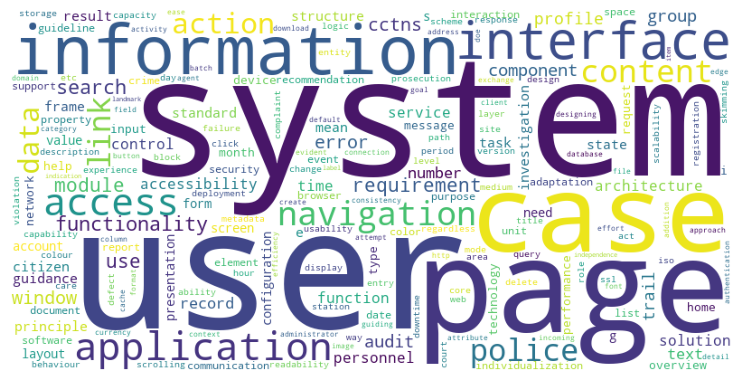

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Applicable' is True
filtered_df = concordance_df[concordance_df['Applicable'] == True]

# Create a dictionary from DataFrame index (Noun) and values (Count)
word_freq = filtered_df['Count'].to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot word cloud
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
plt.show()


### TFIDF
TF-IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.

Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa.

Among the words, tf-idf gives the highest weight to the rarer words. This is how to use the tf-idf to indicate the importance of words or terms inside a collection of documents.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Calculate TF-IDF

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text in df to compute TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# get idf values and feature names
print('\nidf values:')
for ele1, ele2 in zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_):
    print(ele1, ':', ele2)





idf values:
00 : 5.350277936359301
10 : 4.944812828251137
110 : 5.350277936359301
12 : 5.350277936359301
14 : 5.350277936359301
14915 : 5.350277936359301
15 : 4.944812828251137
16 : 5.350277936359301
17 : 5.350277936359301
171 : 4.944812828251137
20 : 4.657130755799356
303 : 5.350277936359301
9241 : 4.097514967863933
a1 : 5.350277936359301
a7 : 5.350277936359301
ability : 4.944812828251137
able : 3.5585184671312464
about : 4.251665647691191
above : 5.350277936359301
acceptable : 4.944812828251137
acceptance : 5.350277936359301
access : 2.9523826635609307
accessed : 4.657130755799356
accessibility : 4.657130755799356
accessible : 4.657130755799356
accompanied : 5.350277936359301
according : 5.350277936359301
account : 4.251665647691191
accused : 5.350277936359301
achieved : 4.944812828251137
achieving : 4.944812828251137
acknowledgements : 5.350277936359301
act : 5.350277936359301
acted : 5.350277936359301
action : 4.433987204485146
actions : 3.740840023925201
activated : 5.35027793635

In [8]:
# Rename the index column to "Noun"
#concordance_df = concordance_df.rename_axis('Noun')

# Get feature names (words) from TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out().tolist()

# Step 2: Calculate TF-IDF scores for each noun in concordance_df['Noun']

# Create a new column 'TF-IDF_score' in concordance_df and initialize it with NaN
concordance_df['TF-IDF_score'] = float(0)

# Iterate over each row in the DataFrame
for noun, row in concordance_df.iterrows():
    # Check if the noun is present in the feature names
    if noun in feature_names:
        # Get the index of the noun in the feature names
        index_ = feature_names.index(noun)
        # Get the TF-IDF score for the noun from the TF-IDF matrix
        tfidf_score = tfidf_matrix[:, index_].toarray().mean()  # Take the mean TF-IDF score across all documents
        # Update the corresponding cell in the 'TF-IDF_score' column with the TF-IDF score
        concordance_df.at[noun, 'TF-IDF_score'] = tfidf_score

# Display the updated DataFrame
print(concordance_df)

               Count  Applicable  TF-IDF_score
Noun                                          
a1                 1        True      0.000999
ability            3        True      0.002241
access            24        True      0.026573
accessibility      8        True      0.004606
account            6        True      0.004941
...              ...         ...           ...
www                1        True      0.002408
x                  1        True      0.000000
xx                 1        True      0.007059
xxx                1        True      0.001715
year               1        True      0.001715

[466 rows x 3 columns]


In [9]:
def set_applicable_false(concordance_df, words):
    """
    Set the 'Applicable' column to False for the given word(s) in the DataFrame.

    Parameters:
    - concordance_df: DataFrame containing the 'Applicable' column
    - words: A single word or a list of words to set 'Applicable' to False
    """
    # If a single word is provided, convert it to a list
    if not isinstance(words, list):
        words = [words]

    # Iterate over the words and set 'Applicable' to False
    for word in words:
        concordance_df.loc[word, 'Applicable'] = False

# Example usage:
# If you want to set 'Applicable' to False for multiple words, provide them as a list
words_to_exclude = ['user', 'system', 'access','application','module','functionality','navigation','interface','page','text','data']
set_applicable_false(concordance_df, words_to_exclude)


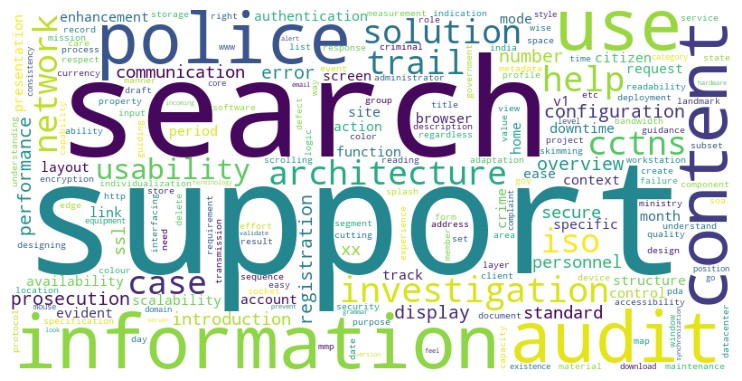

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Applicable' is True
filtered_df = concordance_df[concordance_df['Applicable'] == True]

# Create a dictionary from DataFrame index (Noun) and values (TF-IDF_score)
word_freq = filtered_df['TF-IDF_score'].to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot word cloud
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
plt.show()


## Vectorization
###  CountVectorizer

In [14]:
import utils.CleanData as CleanData
from sklearn.feature_extraction.text import CountVectorizer

# Analysier paramether we can pass a function to clean the text
count_vect = CountVectorizer(analyzer=CleanData.clean_and_lemm_text)
X_counts = count_vect.fit_transform(df['text'])

# This will output ("how many rows where analysied", "How many unique words there are")
print(X_counts.shape)
print(count_vect.get_feature_names_out())

# FIXME: The clean_and_lemm_text is not returnig a string, but a list.

AttributeError: 'list' object has no attribute 'words'

### Vectorizers output sparse matrices

X_counts_sample is a _**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [ ]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

### Vectorizing Raw Data: N-Grams

In [ ]:
# N-Grams needs a string, not a list o strings
# meaning that after tokenizing it will join the tokens again as a string
def clean_text_2string(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

df['text_clean2string'] = df['text'].apply(lambda x: clean_text_2string(x))
df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# (x,y) are the start and end point of n-grams capturing
# (1,1) only unigrams
# (1,2) unigrams and bigrams
# (1,3) unigrams, bigrams and trigrams
# ...
ngram_vect = CountVectorizer(ngram_range=(1,3))
X_counts = ngram_vect.fit_transform(req_df['text_clean2string'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

In [ ]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names_out()
X_counts_df

### Vectorizing Raw Data: TF-IDF

In [ ]:
def clean_text_2stem(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text_2stem)
X_tfidf = tfidf_vect.fit_transform(req_df['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names_out()
X_tfidf_df